In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Install Necessary Modules:

In [36]:
!pip install numpy pandas opencv-python face-recognition

Import Necessary Libraries:

In [37]:
import os
from os.path import join
from glob import glob
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.notebook import tqdm
from skimage.io import imshow
from time import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

# Load dataset

Load train dataset

In [38]:
lfw_dir_train =  '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train'
list_human_train = sorted(glob(join(lfw_dir_train, '*')))
list_jpg_train = sorted(glob(join(lfw_dir_train, '*/*.png')))

# 전체 얼굴 이미지 로딩하기
list_img_train = []
for jpg_path in tqdm(list_jpg_train):
    list_img_train.append(cv2.imread(jpg_path, 1))
np_imgs_train = np.array(list_img_train)
print(np_imgs_train.shape)
# (966, 50, 37, 3)

  0%|          | 0/966 [00:00<?, ?it/s]

(966, 50, 37, 3)


classify y_train values

In [39]:
lfw_dir_train_Ariel= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train/Ariel_Sharon')
lfw_dir_train_Colin =os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train/Colin_Powell')
lfw_dir_train_Donald= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train/Donald_Rumsfeld')
lfw_dir_train_George= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train/George_W_Bush')
lfw_dir_train_Gerhard= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train/Gerhard_Schroeder')
lfw_dir_train_Hugo= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train/Hugo_Chavez')
lfw_dir_train_Tony= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/train/Tony_Blair')

y_train=np.array([])

for i in range(len(lfw_dir_train_Ariel)):
  y_train=np.append(y_train,0)
for i in range(len(lfw_dir_train_Colin)):
  y_train=np.append(y_train,1)
for i in range(len(lfw_dir_train_Donald)):
  y_train=np.append(y_train,2)
for i in range(len(lfw_dir_train_George)):
  y_train=np.append(y_train,3)
for i in range(len(lfw_dir_train_Gerhard)):
  y_train=np.append(y_train,4)
for i in range(len(lfw_dir_train_Hugo)):
  y_train=np.append(y_train,5)
for i in range(len(lfw_dir_train_Tony)):
  y_train=np.append(y_train,6)
y_train = y_train.astype(int)
#print(y_train)

Load test dataset

In [40]:
lfw_dir_test =  '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test'

list_human_test = sorted(glob(join(lfw_dir_test, '*')))
print(list_human_test[:3])
list_jpg_test = sorted(glob(join(lfw_dir_test, '*/*.png')))
print(len(list_jpg_test), list_jpg_test[:10])

# 전체 얼굴 이미지 로딩하기
list_img_test = []
for jpg_path in tqdm(list_jpg_test):
    list_img_test.append(cv2.imread(jpg_path, 1))
np_imgs_test = np.array(list_img_test)
print(np_imgs_test.shape)
# (322, 50, 37, 3)

['../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Colin_Powell', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Donald_Rumsfeld']
322 ['../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00024.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00052.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00081.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00123.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00157.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00168.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00209.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00217.png', '../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon/00218.png', '

  0%|          | 0/322 [00:00<?, ?it/s]

(322, 50, 37, 3)


classify y_test values

In [41]:
lfw_dir_test_Ariel= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Ariel_Sharon')
lfw_dir_test_Colin =os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Colin_Powell')
lfw_dir_test_Donald= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Donald_Rumsfeld')
lfw_dir_test_George= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/George_W_Bush')
lfw_dir_train_Gerhard= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Gerhard_Schroeder')
lfw_dir_test_Hugo= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Hugo_Chavez')
lfw_dir_test_Tony= os.listdir('../content/gdrive/MyDrive/생체/pca_data1/data/pca_data1/test/Tony_Blair')


y_test=np.array([])

for i in range(len(lfw_dir_test_Ariel)):
  y_test=np.append(y_test, 0)
for i in range(len(lfw_dir_test_Colin)):
  y_test=np.append(y_test,1)
for i in range(len(lfw_dir_test_Donald)):
  y_test=np.append(y_test,2)
for i in range(len(lfw_dir_test_George)):
  y_test=np.append(y_test,3)
for i in range(len(lfw_dir_train_Gerhard)):
  y_test=np.append(y_test,4)
for i in range(len(lfw_dir_test_Hugo)):
  y_test=np.append(y_test,5)
for i in range(len(lfw_dir_test_Tony)):
  y_test=np.append(y_test,6)

print(len(y_test))
y_test = y_test.astype(int)

322


In [42]:
def show(img_bgr):
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

In [43]:
n_components = 150
X_train= np_imgs_train
X_test = np_imgs_test

height=50
width=37
train_tensor = np.ndarray(shape=(len(np_imgs_train), height*width), dtype=np.float64)
test_tensor = np.ndarray(shape=(len(np_imgs_test), height*width), dtype=np.float64)

for i in range(len(np_imgs_train)):
  img = plt.imread(list_jpg_train[i])
  train_tensor[i,:] = np.array(img, dtype='float64').flatten()

for i in range(len(np_imgs_test)):
  img=plt.imread(list_jpg_test[i])
  test_tensor[i,:]= np.array(img, dtype='float64').flatten()
print(len(train_tensor), len(test_tensor)) # 966 322

966 322


In [44]:
print(test_tensor)

# [[0.64313728 0.63529414 0.63529414 ... 0.07450981 0.06666667 0.05882353]
# [0.65490198 0.64313728 0.65882355 ... 0.1254902  0.11764706 0.12156863]
# [0.54509807 0.53725493 0.54509807 ... 0.86666667 0.90980393 0.91764706]
# ...
# [0.31764707 0.31764707 0.21568628 ... 0.76862746 0.73725492 0.74509805]
# [0.40784314 0.49803922 0.74509805 ... 0.57254905 0.55686277 0.5529412 ]
# [0.27450982 0.25882354 0.34117648 ... 0.5411765  0.48235294 0.44705883]]

[[0.64313728 0.63529414 0.63529414 ... 0.07450981 0.06666667 0.05882353]
 [0.65490198 0.64313728 0.65882355 ... 0.1254902  0.11764706 0.12156863]
 [0.54509807 0.53725493 0.54509807 ... 0.86666667 0.90980393 0.91764706]
 ...
 [0.31764707 0.31764707 0.21568628 ... 0.76862746 0.73725492 0.74509805]
 [0.40784314 0.49803922 0.74509805 ... 0.57254905 0.55686277 0.5529412 ]
 [0.27450982 0.25882354 0.34117648 ... 0.5411765  0.48235294 0.44705883]]


In [45]:
print(train_tensor.shape, test_tensor.shape)
# (966, 1850) (322, 1850)
print(len(train_tensor))
# 966

(966, 1850) (322, 1850)
966


In [46]:
print("Extract top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
# Extract top 150 eigenfaces from 966 faces

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(train_tensor)
eigenfaces = pca.components_.reshape(n_components, height, width)

X_train_pca = pca.transform(train_tensor)
X_test_pca = pca.transform(test_tensor)

Extract top 150 eigenfaces from 966 faces


In [67]:
def plot_gallery(images, titles=None, h=50, w=37, n_row=1, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks([]), plt.yticks([])
        if titles is not None:
            plt.title(titles[i], size=12)

In [48]:
print(eigenfaces.shape[0])

150


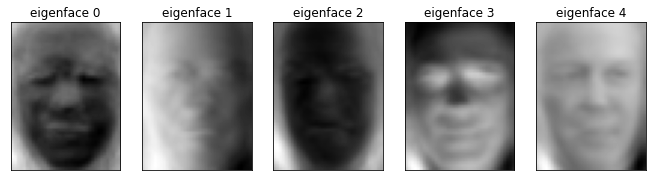

In [68]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, height, width)

choose number of component to use

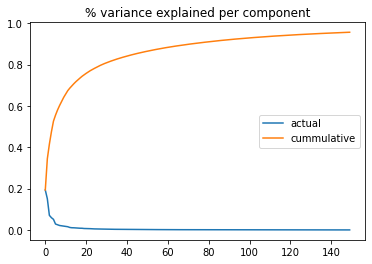

In [50]:
f = plt.plot(pca.explained_variance_ratio_, label="actual")
f = plt.plot(pca.explained_variance_ratio_.cumsum(), label="cummulative")
f = plt.title("% variance explained per component"), plt.legend()

In [51]:
print(eigenfaces.shape)

(150, 50, 37)


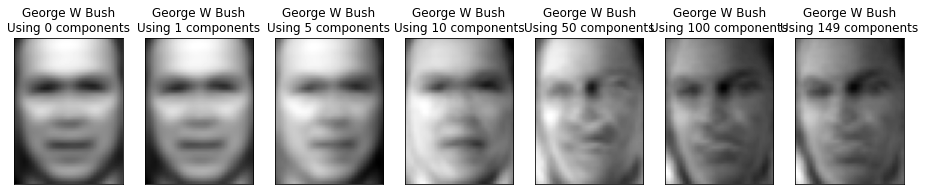

In [52]:
mean_face = pca.mean_.reshape(height, width)
show_components = [0, 1, 5, 10, 50, 100, 149]

components = pca.components_
if pca.whiten:  # If `whiten` was True, multiply components by their singular value
    components = np.array([pca.explained_variance_[i] * components[i] for i in range(n_components)])

no = np.random.choice(np.where(y_train == 3)[0])  # Bush 중 한 장 임의로 선정
faces = np.array([X_train_pca[no][i] * components.reshape(n_components, height, width)[i] 
                  for i in range(n_components)]).cumsum(axis=0)
show_faces = [mean_face] + [mean_face + faces[k] for k in show_components]
target_names_array=['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Hugo Chavez' ,'Tony Blair']
target_names=np.array([])

for i in (target_names_array):
  target_names=np.append(target_names,i)
titles = [target_names[y_train[no]] + "\nUsing %d components" % k for k in show_components]
plot_gallery(show_faces,titles, n_row=1)

### 1. compare L2 distance

In [53]:
np_embs_train = np.zeros((len(np_imgs_train), 128))

for idx, img in enumerate(tqdm(np_imgs_train)):
    locations = face_recognition.face_locations(img)
    encodings = face_recognition.face_encodings(img, locations)
    if len(encodings) > 0:
      np_embs_train[idx] = encodings[0]

print(np_embs_train.shape)
# (966, 128)

  
np_embs_test = np.zeros((len(np_imgs_test), 128))

for idx, img in enumerate(tqdm(list_img_test)):
  locations = face_recognition.face_locations(img)
  encodings = face_recognition.face_encodings(img, locations)
  if len(encodings) > 0:
    np_embs_test[idx] = encodings[0]
print(np_embs_test.shape)

  0%|          | 0/966 [00:00<?, ?it/s]

(966, 128)


  0%|          | 0/322 [00:00<?, ?it/s]

(322, 128)


prediction with L2 distance

In [54]:
y_pred_dis=np.array([])
for i in range(len(np_imgs_test)):
  np_dis_test = np.linalg.norm(np_embs_test[i] - np_embs_train, axis=1)
  y_pred_dis=np.append(y_pred_dis,y_train[np_dis_test.argmin()])
y_pred_dis = y_pred_dis.astype(int)
print(y_pred_dis)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 2
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 0 3 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3
 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 4 4 0 4 4 4 4 0 4 4 0 4 4
 4 0 4 4 4 4 4 4 4 4 0 4 5 5 5 0 5 0 0 5 5 0 5 5 5 5 5 6 0 6 6 6 6 6 0 6 6
 6 6 0 6 0 6 6 0 0 6 6 6 6 6 6 0 6 6 0 6 6 6 6 6 0 0]


### 2. use SVM classification model

Training

In [55]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],}

classifier = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
print(len(X_train_pca),len(y_train))
classifier = classifier.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(classifier.best_estimator_)

966 966
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


Testing the classifier 

In [56]:
y_pred = classifier.predict(X_test_pca)

# Calculate Matrix

### 1. L2 distance

calculate precision, recall, accuracy

In [57]:
print(classification_report(y_test, y_pred_dis, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.18      1.00      0.31        13
     Colin Powell       1.00      0.75      0.86        60
  Donald Rumsfeld       1.00      0.74      0.85        27
    George W Bush       1.00      0.88      0.94       146
Gerhard Schroeder       1.00      0.80      0.89        25
      Hugo Chavez       1.00      0.73      0.85        15
       Tony Blair       1.00      0.72      0.84        36

         accuracy                           0.82       322
        macro avg       0.88      0.80      0.79       322
     weighted avg       0.97      0.82      0.87       322



confusion matrix

[[ 13   0   0   0   0   0   0]
 [ 15  45   0   0   0   0   0]
 [  7   0  20   0   0   0   0]
 [ 17   0   0 129   0   0   0]
 [  5   0   0   0  20   0   0]
 [  4   0   0   0   0  11   0]
 [ 10   0   0   0   0   0  26]]


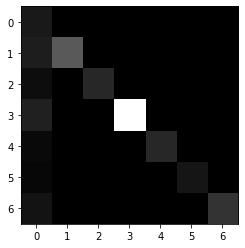

In [58]:
confusion_matrix_dis=(confusion_matrix(y_test, y_pred_dis, labels=range(7)))
print(confusion_matrix_dis)
plt.gray()
_ = plt.imshow(confusion_matrix_dis, interpolation='nearest')

### SVM classifier

calculate precision, recall, accuracy

In [59]:
print (classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.82      0.98      0.89       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       1.00      0.81      0.89        36

         accuracy                           0.86       322
        macro avg       0.92      0.74      0.80       322
     weighted avg       0.87      0.86      0.85       322



plot confusion matrix

[[  7   1   0   5   0   0   0]
 [  1  52   0   7   0   0   0]
 [  0   2  17   8   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   4  20   0   0]
 [  0   4   0   2   1   8   0]
 [  0   1   1   5   0   0  29]]


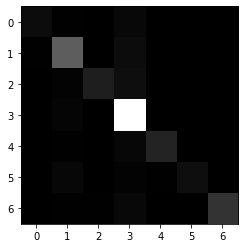

In [60]:
confusion_matrix=(confusion_matrix(y_test, y_pred, labels=range(7)))
print(confusion_matrix)
plt.gray()
_ = plt.imshow(confusion_matrix, interpolation='nearest')

### Calulate George_W_Bush FAR, FRR 

In [61]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [62]:
correct_pred = 0
FRR_count = 0
FAR_count = 0


for i in range(len(y_test)):
  match=y_test[i]==y_pred[i]
  if y_test[i]==y_pred[i]==3:
    correct_pred+=1
  elif y_test[i]==3:
    FRR_count+=1;
  elif y_train[i]==3:
    FAR_count+=1

print(correct_pred, FRR_count, FAR_count) #143 3 0

FRR = FRR_count/len(y_test) # 0.009316770186335404
FAR=FAR_count/len(y_test) # 0.0
print(FRR, FAR)

143 3 0
0.009316770186335404 0.0


# recognization with my face

In [63]:
my_face_path = sorted(glob('../content/gdrive/MyDrive/생체/pca_data1/data/my_face_*.jpg'))
  

list_my_img = [cv2.resize(cv2.imread(p), None, fx=0.5, fy=0.5) for p in my_face_path]
for img in list_my_img:
  print(img.shape)

# (1080, 1080, 3)
# (1440, 1080, 3)
# (1158, 1544, 3)

np_embs_user = np.zeros((len(list_my_img), 128))

for idx, img in enumerate(tqdm(list_my_img)):
  locations = face_recognition.face_locations(img)
  encodings = face_recognition.face_encodings(img, locations)
  if len(encodings) > 0:
      np_embs_user[idx] = encodings[0]
  else:
      print(idx, 'no face')

(1440, 1080, 3)
(1158, 1544, 3)
(1080, 1080, 3)


  0%|          | 0/3 [00:00<?, ?it/s]

Classified by training dataset people

0.6154929696118564


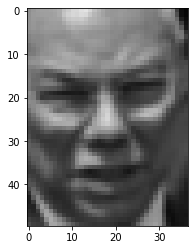

[0.         0.29664289 0.25213758]


In [64]:
# 0번 이미지와 train db 의 거리 계산
np_dist_user_db = np.linalg.norm(np_embs_user[0] - np_embs_train, axis=1)
print(np_dist_user_db.min()) # 0.6154929696118564
show(list_img_train[np_dist_user_db.argmin()])

# 0번 이미지와 user 이미지 전체의 거리 계산
np_dist_user_user = np.linalg.norm(np_embs_user[0] - np_embs_user, axis=1)
print(np_dist_user_user)


In [65]:
# 다른 user 이미지 값 distance
np_dist_user_db_1 = np.linalg.norm(np_embs_user[1] - np_embs_train, axis=1)
print(np_dist_user_db_1.min()) # 0.6201928088830718
np_dist_user_db_2 = np.linalg.norm(np_embs_user[2] - np_embs_train, axis=1)
print(np_dist_user_db_2.min()) # 0.6016237963227641

0.6201928088830718
0.6016237963227641


classify 7 people and me

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   7.,  11.,  13.,  19.,  20.,  15.,  24.,  25.,
         22.,  28.,  33.,  42.,  20.,  29.,  48.,  49.,  59.,  89.,  75.,
         82.,  60.,  20.,  11.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 156.,   0.,   0.,
          0.,   0.,   0.]),
 array([0.4   , 0.4125, 0.425 , 0.4375, 0.45  , 0.4625, 0.475 , 0.4875,
        0.5   , 0.5125, 0.525 , 0.5375, 0.55  , 0.5625, 0.575 , 0.5875,
        0.6   , 0.6125, 0.625 , 0.6375, 0.65  , 0.6625, 0.675 , 0.6875,
        0.7   , 0.7125, 0.725 , 0.7375, 0.75  , 0.7625, 0.775 , 0.7875,
        0.8   , 0.8125, 0.825 , 0.8375, 0.85  , 0.8625, 0.875 , 0.8875,
        0.9   , 0.9125, 0.925 , 0.9375, 0.95  , 0.9625, 0.975 , 0.9875,
        1.    , 1.0125

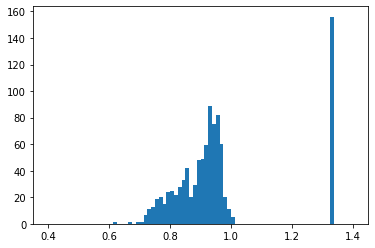

In [66]:
plt.hist(np_dist_user_db, range=(0.4,1.4), bins=80)